# Predictive Analytics

## Importing Libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Data Loading

In [ ]:
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: reevald
Your Kaggle Key: ··········


100%|██████████| 16.0k/16.0k [00:00<00:00, 7.30MB/s]

In [ ]:
insurance = pd.read_csv("/content/insurance/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Output kode di atas memberikan informasi sebagai berikut:

* Ada 1338 baris (records atau jumlah pengamatan) dalam dataset.
* Terdapat 7 kolom yaitu: age, sex, bmi, children, smoker, region, charges

## Data Exploration

### Deskripsi Variabel

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance), variabel-variabel pada Diamond dataset adalah sebagai berikut:

- age: merepresentasikan usia pengguna
- sex: merepresentasikan jenis kelamin pengguna
- bmi: merepresentasikan berat badan pengguna
- children: merepresentasikan jumlah anak yang dimiliki
- smoker: merepresentasikan status perokok atau bukan perokok
- region: merepresentasikan wilayah tempat tinggal pengguna
- charges: biaya medis pengguna yang ditagih oleh asuransi kesehatan

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi info() berikut.

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari output terlihat bahwa:
- Terdapat 3 kolom dengan tipe object, yaitu: sex, smoker, region. Kolom ini merupakan *categorical features* (fitur non-numerik)
- Terdapat 4 kolom numerik dengan tipe data float64 atau int64, yaitu: age, bmi, children, charges.
- Fitur charges adalah target fitur kita.

Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, Anda perlu mengecek deskripsi statistik data dengan fitur describe().

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Menangani Missing Value

In [ ]:
list_fitur_kategorik = ["sex", "smoker", "region"]
list_fitur_numerik = ["age", "bmi", "children", "charges"]

Mari kita cek ada berapa missing value pada semua kolom.

In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dari output isnull().sum() terlihat bahwa setiap fitur tidak memiliki missing value.

### Menangani Outlier

Pada kasus ini, kita akan mendeteksi outliers dengan teknis visualisasi data (boxplot). Kemudian kita akan menangani outliers dengan metode IQR.

Sekarang, mari kita lakukan visualisasi pada fitur numerik.

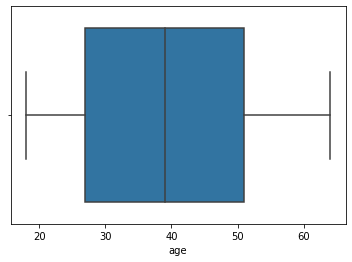

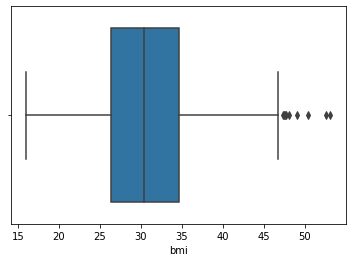

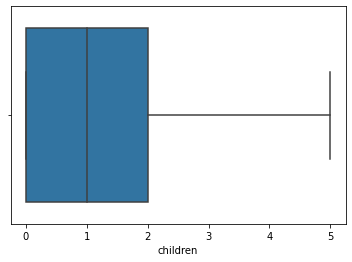

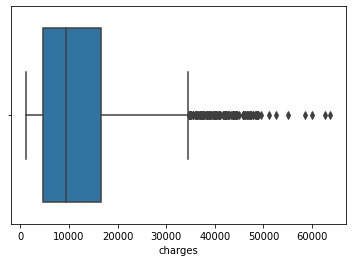

In [ ]:
for fitur in list_fitur_numerik:
  sns.boxplot(x=insurance[fitur])
  plt.show()

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers (fitur bmi). Kita akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

Seltman dalam “Experimental Design and Analysis” [[1]](https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf) menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 IQR di atas Q3 atau 1.5 IQR di bawah Q1.

Berikut persamaannya:
```
Batas bawah = Q1 - 1.5 * IQR
Batas atas = Q3 + 1.5 * IQR
```
Mari kita terapkan ke dalam kode

In [ ]:
Q1 = insurance.quantile(0.25)
Q3 = insurance.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[~((insurance<(Q1-1.5*IQR))|(insurance>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
insurance.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(1193, 7)

Banyak outlier yang dibersihkan sebanyak 1338 - 1193 = 145 (baris atau sampel). Kita akan cek kembali dengan boxplot setelah membersihkan outlier.

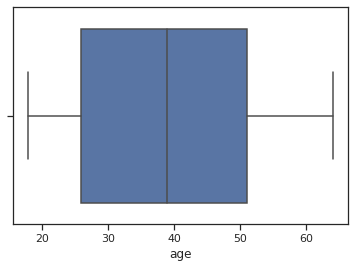

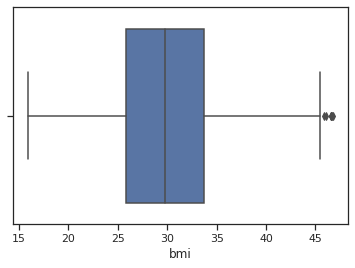

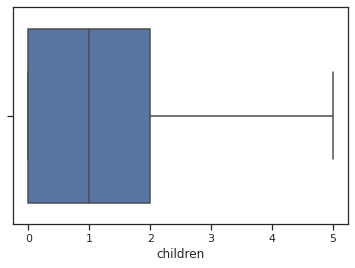

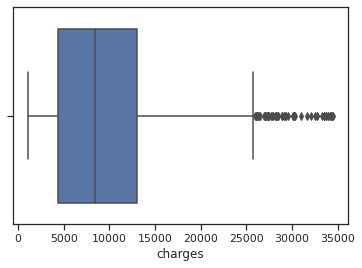

In [ ]:
for fitur in list_fitur_numerik:
  sns.boxplot(x=insurance[fitur])
  plt.show()

### Univariate Analysis

#### Fitur Kategorik

In [ ]:
def visualisasi_fitur_kategorik(feature):
  count = insurance[feature].value_counts()
  percent = 100 * insurance[feature].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(df)
  count.plot(kind='bar', title=feature);
  plt.show()

        jumlah sampel  persentase
female            611        51.2
male              582        48.8


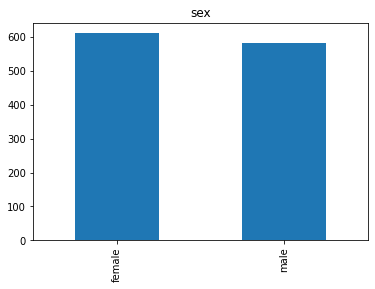

     jumlah sampel  persentase
no            1055        88.4
yes            138        11.6


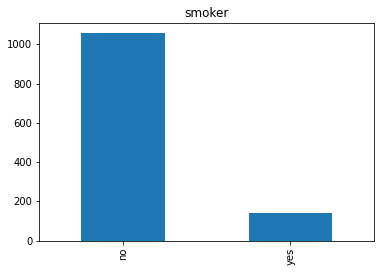

           jumlah sampel  persentase
northwest            305        25.6
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


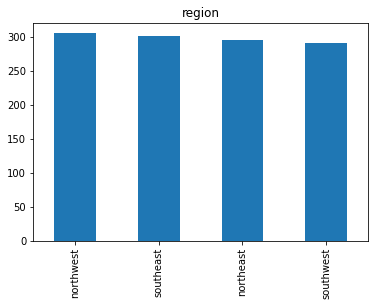

In [ ]:
for fitur in list_fitur_kategorik:
  visualisasi_fitur_kategorik(fitur)


Dar hasil output di atas, didapatkan informasi:
- Terdapat 2 kategori pada fitur sex, secara berurutan dari jumlahnya paling banyak yaitu: female (611) dan male (582).
- Terdapat 2 kategori pada fitur smoker, secara berurutan dari jumlahnya paling banyak yaitu: no (1055) dan yes (138). Dari data presentase dapat kita simpulkan bahwa lebih dari 80% merupakan bukan perokok.
- Terdapat 4 kategori pada fitur region, secara berurutan dari jumlahnya paling banyak yaitu: northwest (305), southeast (302), northeast (295), southwest (291).

#### Fitur Numerik

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

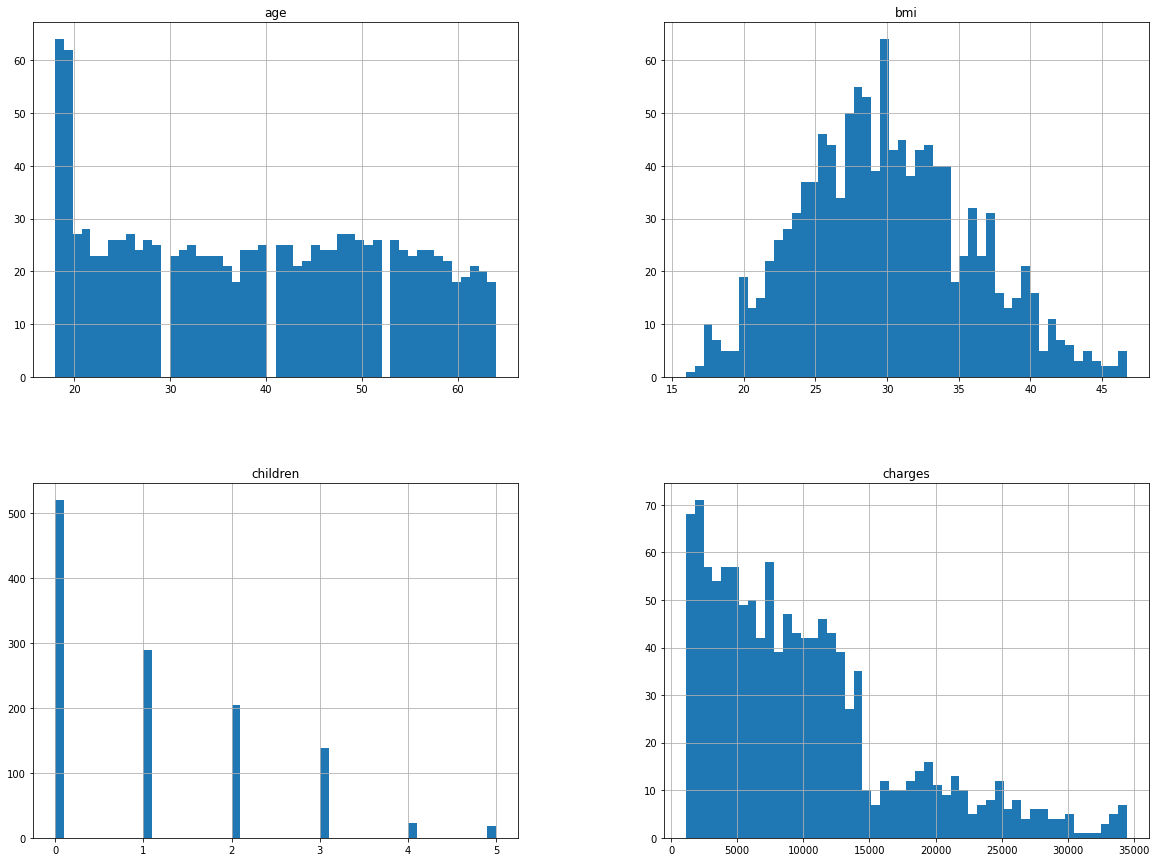

In [ ]:
insurance[list_fitur_numerik].hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "charges" yang merupakan fitur target (label) pada data kita.

- Pada histogram age terdapat peningkatan jumlah pengguna dijenjang umur kurang dari 20 tahun
- Pada histogram charges miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis

#### Fitur Kategorik

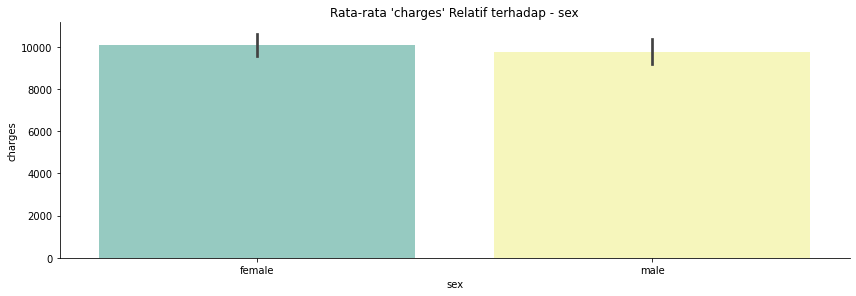

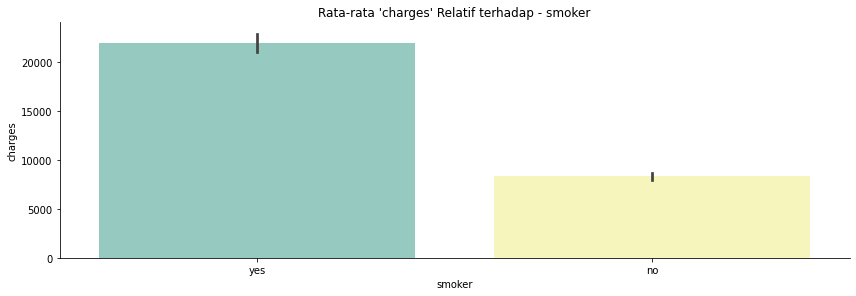

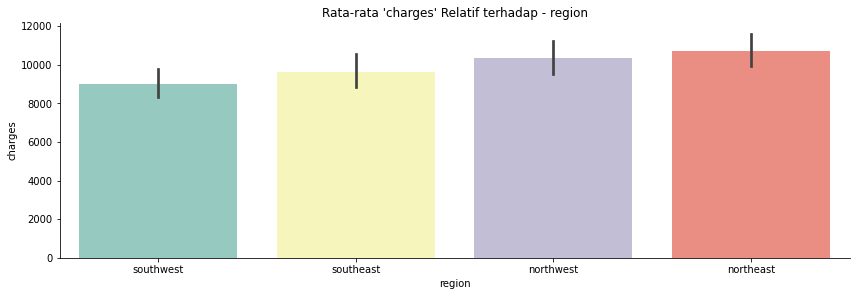

In [ ]:
cat_features = insurance.select_dtypes(include='object').columns.to_list()

for col in list_fitur_kategorik:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=insurance, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata charges terhadap fitur kategorik di atas, kita memperoleh *insight* sebagai berikut:
- Pada fitur `sex`, rata-rata charges cenderung mirip, rentangnya berada antara 9500 hingga 10000. Sehingga fitur `sex` memiliki pengaruh atau dampak yang kecil.
- Pada fitur `smoker`, rata-rata charges pada perokok lebih dari 20000. Hal ini jauh lebih tinggi dari rata-rata charges pada non-perokok yang berada di sekitar 7000. Sehingga fitur `smoker` memiliki pengaruh atau dampak yang cukup besar.
- Pada fitur `region`, rata-rata charges cenderung mirip, rentangnya berada antara 9000 hingga 10000. Sehingga fitur `region` memiliki pengaruh atau dampak yang kecil.

#### Fitur Numerik

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). Tidak perlu menunggu lama, mari kita langsung analisis datanya.

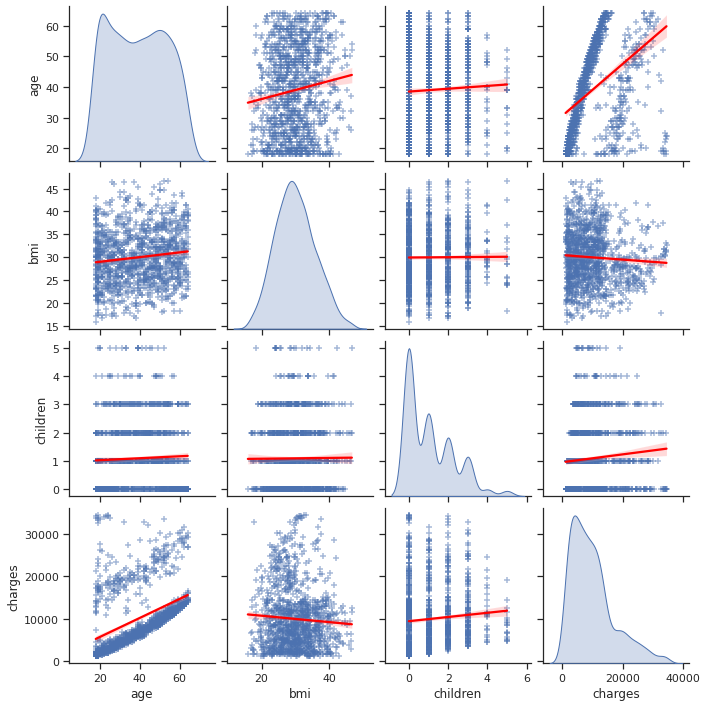

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.set(style="ticks", color_codes=True)
sns.pairplot(insurance[list_fitur_numerik],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Pada pola sebaran data grafik pairplot di atas, terlihat fitur age memiliki korelasi cukup kuat (positif) dengan fitur charges (target). Untuk mengevaluasi skor korelasinya, kita akan gunakan fungsi corr() sebagai berikut.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

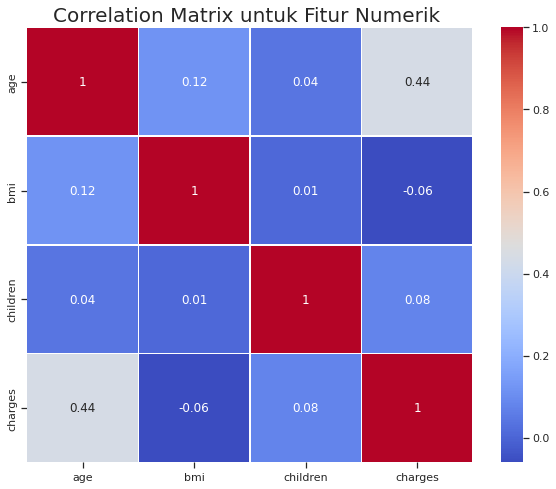

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = insurance[list_fitur_numerik].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Semakin dekat nilainya ke 1 atau -1, maka korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0 maka korelasinya semakin lemah.

Dari grafik korelasi di atas, fitur age memiliki korelasi yang cukup kuat (0.44) dengan fitur target charges.

## Data Preparation

### Encoding Fitur Kategori

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Library scikit-learn menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Kita memiliki tiga variabel kategori dalam dataset kita, yaitu 'sex', 'smoker', dan 'region'. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
insurance = pd.concat([insurance, pd.get_dummies(insurance['sex'], prefix='sex')],axis=1)
insurance = pd.concat([insurance, pd.get_dummies(insurance['smoker'], prefix='smoker')],axis=1)
insurance = pd.concat([insurance, pd.get_dummies(insurance['region'], prefix='region')],axis=1)
insurance.drop(['sex','smoker','region'], axis=1, inplace=True)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Sekarang, variabel kategori kita telah berubah menjadi variabel numerik.

### Reduksi Dimensi dengan PCA

PCA umumnya digunakan ketika variabel dalam data yang memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Sebelumnya kita perlu cek kembali korelasi antar fitur (selain fitur target) dengan menggunakan pairplot.

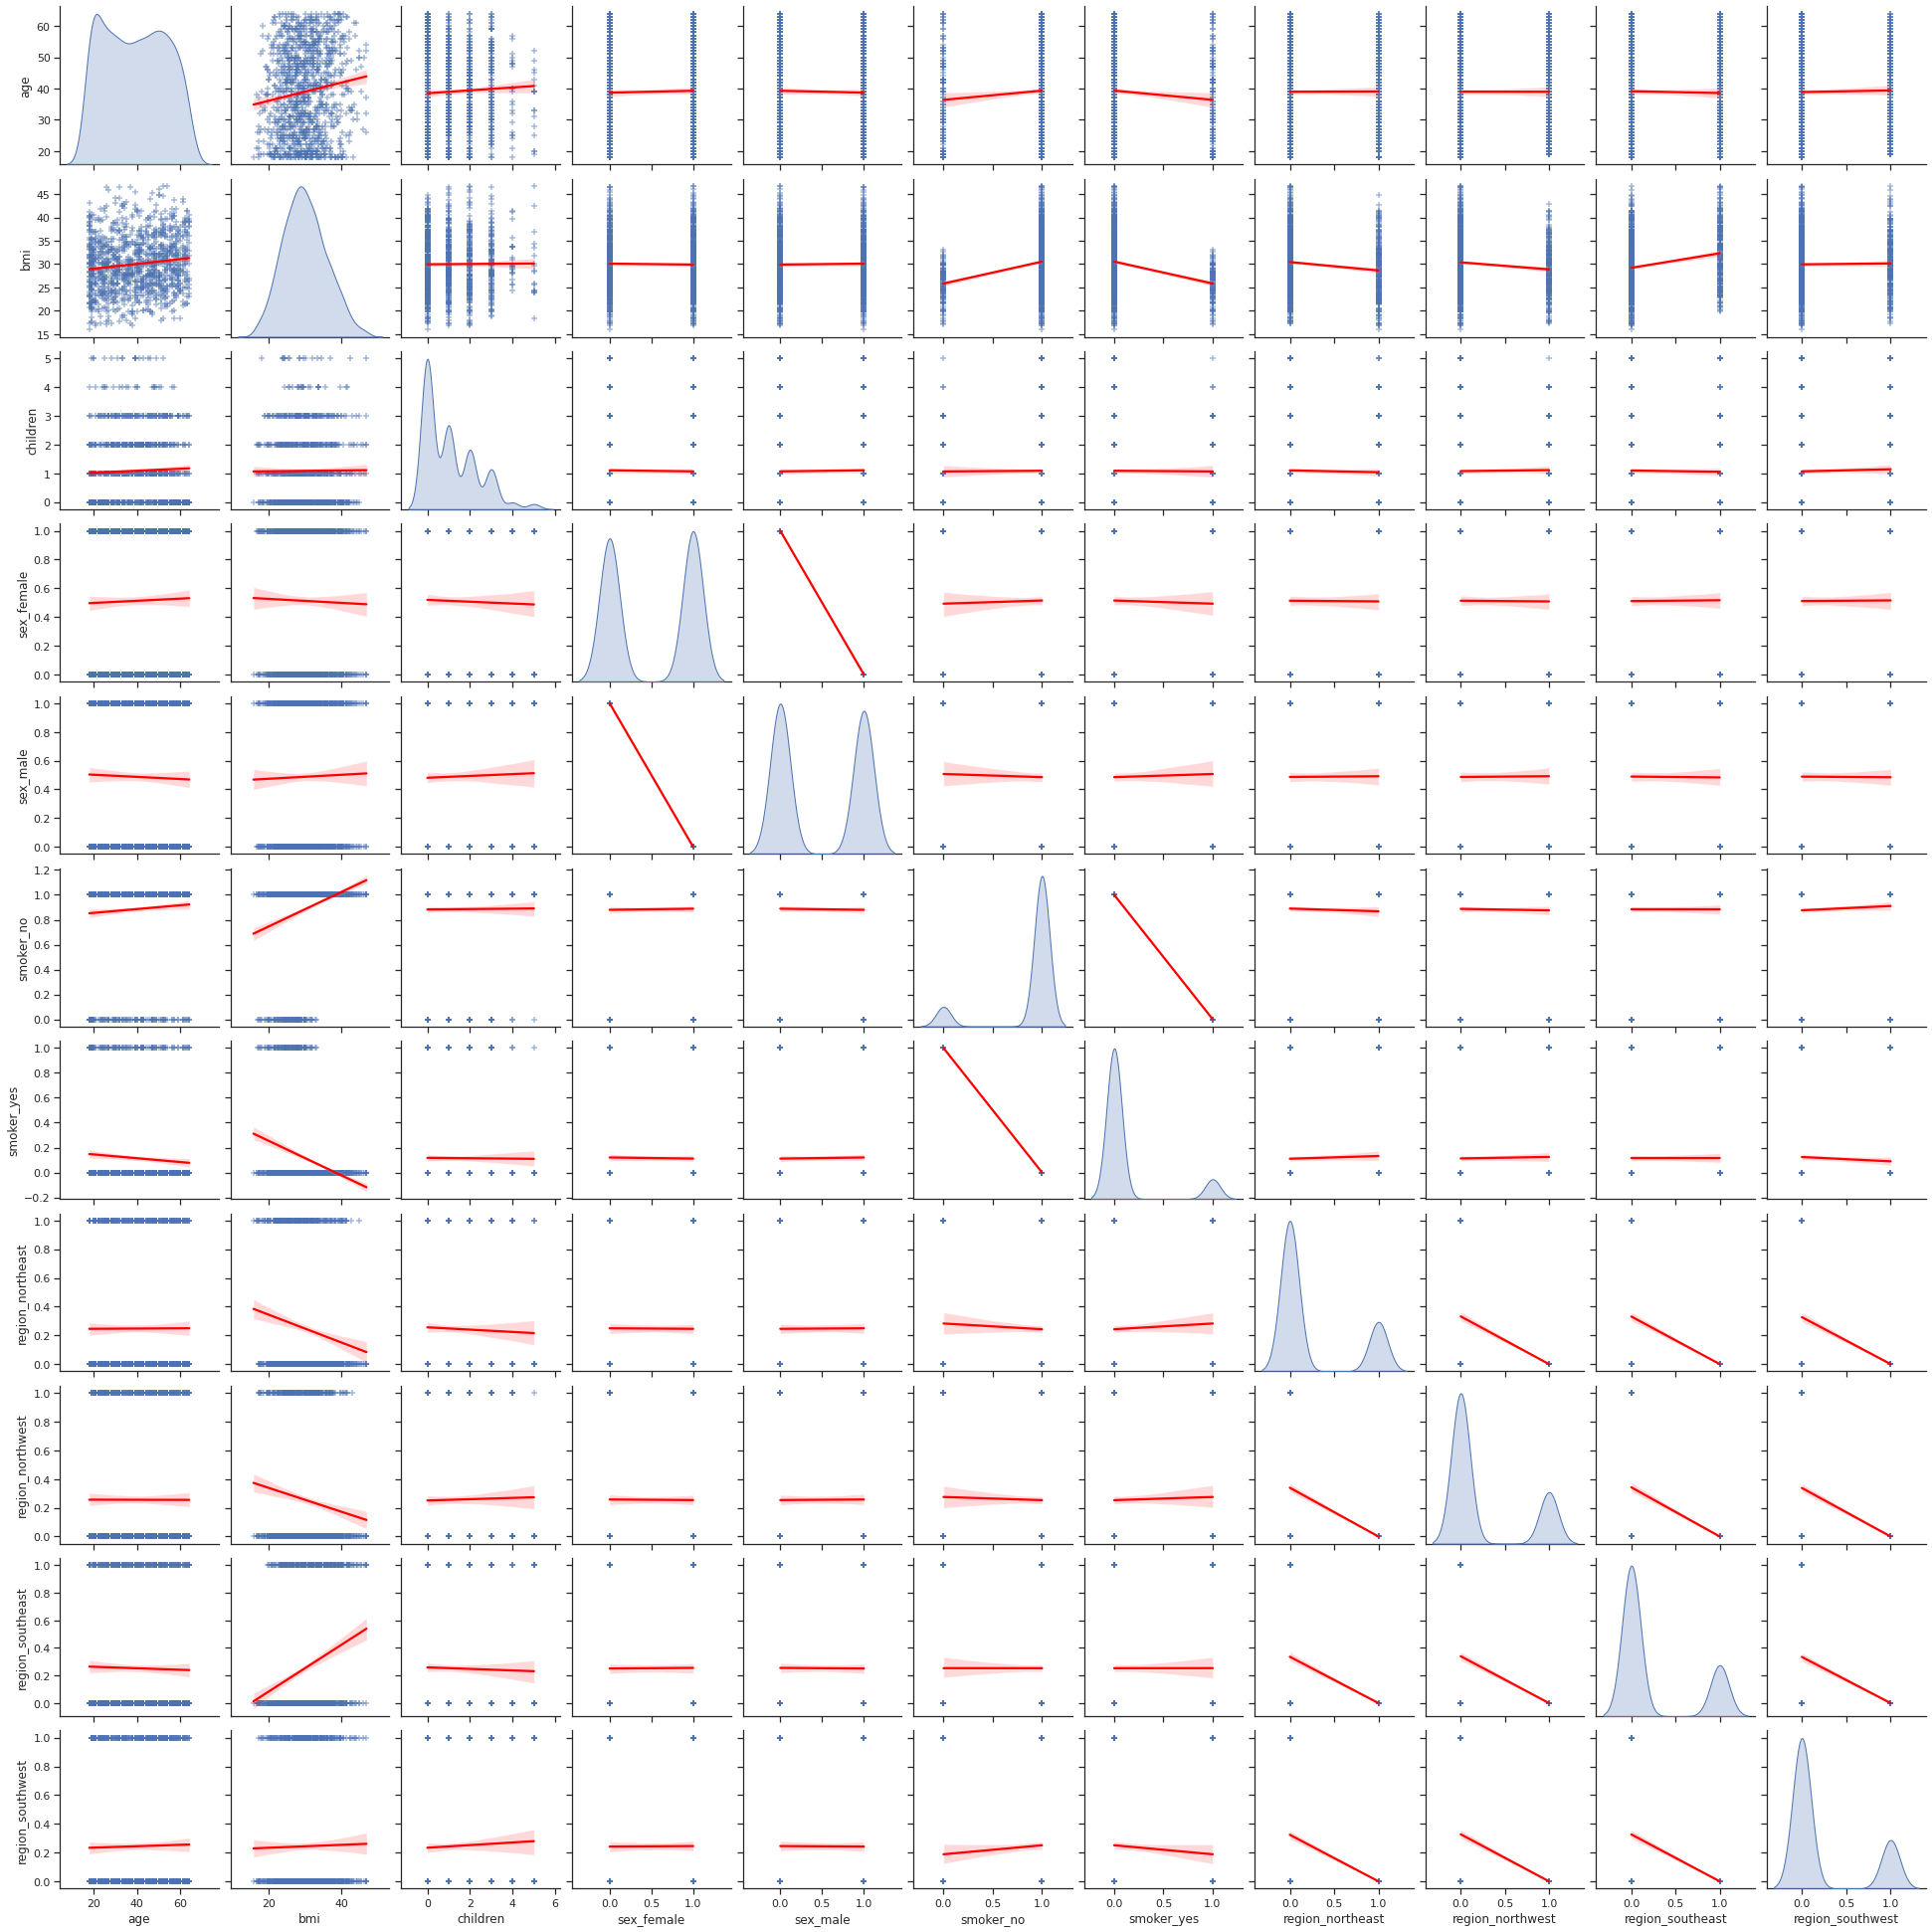

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(insurance[[fitur for fitur in insurance.keys() if fitur != "charges"]],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Selanjutnya kita akan mereduksi region_northeast, region_northwest,  region_southeast, region_southwest karena keempatnya berkorelasi cukup kuat yang dapat dilihat pada visualisasi pairplot di atas.

In [ ]:
from sklearn.decomposition import PCA

list_calon_fitur_pca = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
pca = PCA(n_components=len(list_calon_fitur_pca), random_state=123)
pca.fit(insurance[list_calon_fitur_pca])
princ_comp = pca.transform(insurance[list_calon_fitur_pca])

Setelah menerapkan class PCA dengan n_components sebanyak fitur yang dikenakan PCA, kita bisa mengetahui proporsi informasi dari kedua komponen hasil PCA sebagai berikut:

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.339, 0.333, 0.327, 0.   ])

Arti dari output di atas adalah, 33.9% informasi pada keempat fitur ( region_northeast, region_northwest, region_southeast, region_southwest ) terdapat pada PC (Principal Component) pertama. Sedangkan sisanya sebesar 33.3% terdapat pada PC kedua dan 32.7% pada PC ketiga.

Berdasarkan hasil tersebut, kita akan mereduksi fitur dan hanya mempertahankan PC (komponen) pertama, kedua dan ketiga. Ketiga PC ini akan menjadi fitur yang menggantikan empat fitur lainnya ( region_northeast, region_northwest, region_southeast, region_southwest ). Kita beri nama fitur ini PCA_region_1, PCA_region_2, PCA_region_3.


In [ ]:
pca = PCA(n_components=3, random_state=123)
pca.fit(insurance[list_calon_fitur_pca])
df_PCAT = pca.transform(insurance[list_calon_fitur_pca])
df_PCAT = pd.DataFrame(df_PCAT, columns=['PCA_region_1', 'PCA_region_2', 'PCA_region_3'])
insurance['PCA_region_1'] = df_PCAT['PCA_region_1']
insurance['PCA_region_2'] = df_PCAT['PCA_region_2']
insurance['PCA_region_3'] = df_PCAT['PCA_region_3']
insurance.drop(list_calon_fitur_pca, axis=1, inplace=True)
display(insurance.sample(5))

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,PCA_region_1,PCA_region_2,PCA_region_3
33,63,28.310,0,13770.09790,0,1,1,0,-0.601530,-0.601924,-0.140171
892,54,24.035,0,10422.91665,0,1,1,0,-0.601530,-0.601924,-0.140171
280,40,28.120,1,22331.56680,1,0,0,1,-0.117512,0.661695,-0.551258
1137,26,22.230,0,3176.28770,1,0,1,0,-0.601530,-0.601924,-0.140171
618,19,33.110,0,34439.85590,1,0,0,1,0.786077,-0.331013,-0.106222


### Train Test Split

Pada modul ini, kita akan menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn. 

In [ ]:
from sklearn.model_selection import train_test_split

insurance.dropna(inplace=True)
X = insurance.drop(["charges"],axis =1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1064
Total # of sample in train dataset: 851
Total # of sample in test dataset: 213


### Standarisasi

Proses standarisasi bertujuan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandarScaler menghasilkan distribusi deviasi sama dengan 1 dan mean sama dengan 0.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = [fitur for fitur in insurance.keys() if fitur != 'charges']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,PCA_region_1,PCA_region_2,PCA_region_3
51,-1.329346,0.596093,0.797472,0.968760,-0.968760,0.356584,-0.356584,1.543458,-0.650103,-0.204389
869,-1.045445,-0.979169,1.641563,0.968760,-0.968760,0.356584,-0.356584,-1.187843,-1.191099,-0.273566
613,-0.406669,-1.874013,1.641563,0.968760,-0.968760,0.356584,-0.356584,-0.235124,1.332285,-1.111247
630,0.941860,1.013123,-0.046618,-1.032247,1.032247,0.356584,-0.356584,-0.235124,1.332285,-1.111247
1126,1.083810,-0.033674,-0.890709,-1.032247,1.032247,0.356584,-0.356584,-1.187843,-1.191099,-0.273566


## Model Development

Pada tahap ini, kita akan menggunakan tiga algoritma untuk kasus regresi ini. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menetukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. K-Nearest Neighbor

    Kelebihan algoritma KNN adalah mudah dipahami dan digunakan sedangkan kekurangannya kika dihadapkan pada jumlah fitur atau dimensi yang besar rawan terjadi bias.

2. Random Forest
    
    Kelebihan algoritma Random Forest adalah menggunakan teknik Bagging yang berusaha melawan *overfitting* dengan berjalan secara paralel. Sedangkan kekurangannya ada pada kompleksitas algoritma Random Forest yang membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma seperti Decision Tree.

3. Boosting Algorithm

    Kelebihan algoritma Boosting adalah menggunakan teknik Boosting yang berusaha menurunkan bias dengan berjalan secara sekuensial (memperbaiki model di tiap tahapnya). Sedangkan kekurangannya hampir sama dengan algoritma Random Forest dari segi kompleksitas komputasi yang menjadikan waktu pelatihan relatif lebih lama, selain itu noisy dan outliers sangat berpengaruh dalam algoritma ini.

Untuk langkah pertama, kita akan siapkan DataFrame baru untuk menampung nilai metrik (MSE - *Mean Squared Error*) pada setiap model / algoritma. Hal ini berguna untuk melakukan analisa perbandingan antar model.

In [ ]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### Model KNN

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih k tetangga terdekat. Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang *overfitting* dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k yang terlalu tinggi, maka model yang dihasilkan akan *underfitting* dan prediksinya memiliki bias yang tinggi [[2]](https://learning.oreilly.com/library/view/machine-learning-with/9781617296574/).

Oleh karena itu, kita akan mencoba beberapa nilai k yang berbeda (1 sampai 20) kemudian membandingan mana yang menghasilkan nilai metrik model (pada kasus ini kita pakai *mean squared error*) terbaik. Selain itu, kita akan menggunakan metrik ukuran jarak secara default (Minkowski Distance) pada *library* sklearn.

In [ ]:
list_mse = []
for k in range(1, 21):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_prediction = knn.predict(X_test)
  test_mse = mean_squared_error(y_test, y_prediction)
  list_mse.append(test_mse)
  print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")

Nilai MSE untuk k = 1 adalah : 44207836.988966085
Nilai MSE untuk k = 2 adalah : 31538753.857456606
Nilai MSE untuk k = 3 adalah : 28674920.86315255
Nilai MSE untuk k = 4 adalah : 27629265.834566347
Nilai MSE untuk k = 5 adalah : 25390953.014612235
Nilai MSE untuk k = 6 adalah : 25518720.88723256
Nilai MSE untuk k = 7 adalah : 24308852.57983258
Nilai MSE untuk k = 8 adalah : 23648019.45785829
Nilai MSE untuk k = 9 adalah : 23717372.86834201
Nilai MSE untuk k = 10 adalah : 23786877.344998296
Nilai MSE untuk k = 11 adalah : 23827083.011642676
Nilai MSE untuk k = 12 adalah : 23636700.67855662
Nilai MSE untuk k = 13 adalah : 23457928.835207216
Nilai MSE untuk k = 14 adalah : 23285642.54610008
Nilai MSE untuk k = 15 adalah : 23340812.39508889
Nilai MSE untuk k = 16 adalah : 23272963.082737543
Nilai MSE untuk k = 17 adalah : 22840271.478609767
Nilai MSE untuk k = 18 adalah : 22987447.387531828
Nilai MSE untuk k = 19 adalah : 22663737.78903354
Nilai MSE untuk k = 20 adalah : 22851240.31547341

Dan jika kita coba visualisasikan dengan fungsi plot() dalam DataFrame kita peroleh:

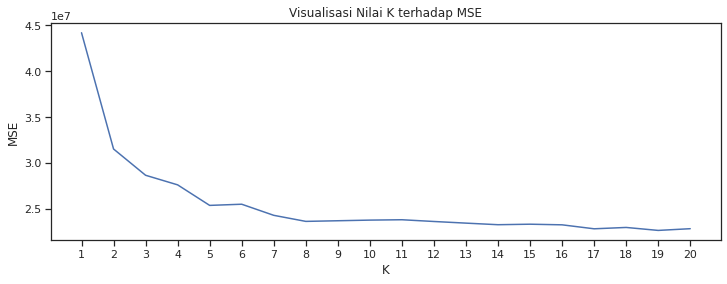

In [ ]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="K",
    ylabel="MSE",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Visualisasi Nilai K terhadap MSE')

Dari hasil output diatas, nilai MSE terbaik dicapai ketika k = 17 yaitu sebesar 22840271.4786. Oleh karena itu kita akan menggunakan k = 17 dan menyimpan nilai MSE nya (terhadap data latih, untuk data uji akan dilakukan pada proses evaluasi) kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=17)
KNN.fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

### Model Random Forest

Random forest merupakan algoritma *supervised learning* yang termasuk ke dalam kategori *ensemble* (group) learning. Pada model *ensemble*, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model *ensemble* ini digabungkan untuk membuat prediksi akhir. Jenis metode *ensemble* yang digunakan pada Random Forest adalah teknik *Bagging*. Metode ini bekerja dengan membuat subset dari data train yang independen. Beberapa model awal (base model / weak model) dibuat untuk dijalankan secara simultan / paralel dan independen satu sama lain dengan subset data train yang independen. Hasil prediksi setiap model kemudian dikombinasikan untuk menentukan hasil prediksi final.

Kita akan menggunakan `RandomForestRegressor` dari *library* scikit-learn dengan base_estimator defaultnya yaitu DecisionTreeRegressor dan parameter-parameter (hyperparameter) yang digunakan antara lain:

- n_estimator: jumlah trees (pohon) di forest.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

Untuk menentukan nilai *hyperparameter* (n_estimator & max_depth) di atas, kita akan melakukan *tuning* dengan GridSearchCV.

In [ ]:
params_rf = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "max_depth": [4, 8, 16, 32]
}

# Grid search model
rs_model = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
    param_grid=params_rf,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=4, n_estimators=10;, score=-15896639.335 total time=   1.2s
[CV 2/5] END max_depth=4, n_estimators=10;, score=-21448366.649 total time=   0.1s
[CV 3/5] END max_depth=4, n_estimators=10;, score=-17797070.171 total time=   0.1s
[CV 4/5] END max_depth=4, n_estimators=10;, score=-16511523.102 total time=   0.1s
[CV 5/5] END max_depth=4, n_estimators=10;, score=-29355546.957 total time=   0.1s
[CV 1/5] END max_depth=4, n_estimators=20;, score=-15734667.985 total time=   0.2s
[CV 2/5] END max_depth=4, n_estimators=20;, score=-21099624.176 total time=   0.2s
[CV 3/5] END max_depth=4, n_estimators=20;, score=-17592499.906 total time=   0.2s
[CV 4/5] END max_depth=4, n_estimators=20;, score=-16274208.034 total time=   0.2s
[CV 5/5] END max_depth=4, n_estimators=20;, score=-29561475.676 total time=   0.2s
[CV 1/5] END max_depth=4, n_estimators=30;, score=-15682414.272 total time=   0.2s
[CV 2/5] END max_depth=4,

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error', verbose=3)

Mengecek hasil tuning hyperparameter dan nilai metrik MSE.

In [ ]:
print("Hasil tuning hyperparameter", rs_model.best_params_)

print("Nilai MSE model GridSearchCV_RF dengan data latih", mean_squared_error(
    y_pred=rs_model.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_RF dengan data uji", mean_squared_error(
    y_pred=rs_model.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'max_depth': 4, 'n_estimators': 90}
Nilai MSE model GridSearchCV_RF dengan data latih 17568673.086090352
Nilai MSE model GridSearchCV_RF dengan data uji 19174816.288664002


Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_rf yaitu 17568673.086 (dengan data train) dan 19174816.288 (dengan data test) dengan n_estimators: 90 dan max_depth: 4. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
RF = RandomForestRegressor(n_estimators=90, max_depth=4)
RF.fit(X_train, y_train)

df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)

### Model Boosting Algorithm

Jika sebelumnya kita menggunakan algoritma *bagging* (Random Forest). Selanjutnya kita akan menggunakan metode lain dalam model *ensemble* yaitu teknik *Boosting*. Algoritma *Boosting* bekerja dengan membangun model dari data train. Kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. Teknik ini bekerja secara sekuensial.

Pada kasus ini kita akan menggunakan metode *Adaptive Boosting*. Untuk implementasinya kita menggunakan AdaBoostRegressor dari library sklearn dengan base_estimator defaultnya yaitu DecisionTreeRegressor hampir sama dengan RandomForestRegressor bedanya menggunakan metode teknik *Boosting*.

Parameter-parameter (hyperparameter) yang digunakan pada algoritma ini antara lain:

- n_estimator: jumlah *estimator* dan ketika mencapai nilai jumlah tersebut algoritma Boosting akan dihentikan.
- learning_rate: bobot yang diterapkan pada setiap *regressor* di masing-masing iterasi Boosting.
- random_state: digunakan untuk mengontrol *random number* generator yang digunakan.

Untuk menentukan nilai *hyperparameter* (n_estimator & learning_rate) di atas, kita akan melakukan *tuning* dengan GridSearchCV.


In [ ]:
params_ab = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "learning_rate": [0.001, 0.01, 0.1, 0.2]
}

# Grid search model
rs_model_ab = GridSearchCV(
    AdaBoostRegressor(random_state=123),
    param_grid=params_ab,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

rs_model_ab.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.001, n_estimators=10;, score=-16767337.388 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=10;, score=-21782923.514 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=10;, score=-18918412.987 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=10;, score=-16045199.377 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=10;, score=-30674852.397 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=20;, score=-16543560.474 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=20;, score=-20699997.924 total time=   0.1s
[CV 3/5] END learning_rate=0.001, n_estimators=20;, score=-19296786.025 total time=   0.1s
[CV 4/5] END learning_rate=0.001, n_estimators=20;, score=-16090195.960 total time=   0.1s
[CV 5/5] END learning_rate=0.001, n_estimators=20;, score=-30077291.650 total time=   0.1s
[CV 1/5] END learning_rate=0

GridSearchCV(estimator=AdaBoostRegressor(random_state=123),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error', verbose=3)

Mengecek hasil tuning hyperparameter dan nilai metrik MSE.

In [ ]:
print("Hasil tuning hyperparameter", rs_model_ab.best_params_)

# AB = AdaBoosting
print("Nilai MSE model GridSearchCV_AB dengan data latih", mean_squared_error(
    y_pred=rs_model_ab.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_AB dengan data uji", mean_squared_error(
    y_pred=rs_model_ab.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'learning_rate': 0.01, 'n_estimators': 50}
Nilai MSE model GridSearchCV_AB dengan data latih 18874829.086555902
Nilai MSE model GridSearchCV_AB dengan data uji 19635802.344583325


Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_ab yaitu 18874829.086 (dengan data train) dan 19635802.344 (dengan data test) dengan n_estimators: 50 dan learning_rate: 0.01. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
boosting = AdaBoostRegressor(n_estimators=20, learning_rate=0.2)
boosting.fit(X_train, y_train)

df_models.loc['Train MSE', 'Boosting'] = mean_squared_error(
    y_pred=boosting.predict(X_train),
    y_true=y_train)

## Evaluasi Model

Dari proses sebelumnya, kita telah membuat tiga model yang berbeda dan juga telah melatihnya. Selanjutnya kita perlu mengevaluasi model-model tersebut menggunakan data uji dan metrik yang digunakan dalam kasus ini yaitu mean_squared_error. Hasil evaluasi kemudian kita simpan ke dalam df_models.

In [ ]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test MSE', name] = mean_squared_error(
      y_pred=model.predict(X_test),
      y_true=y_test)
  
# Mengecek evaluasi model
display(df_models)

,KNN,RandomForest,Boosting
Train MSE,20893830.721874,17583824.714712,21386903.897294
Test MSE,22840271.47861,18797803.324575,21631276.058485


Untuk memudahkan, mari kita *plot* hasil evaluasi model dengan *bar chart*.

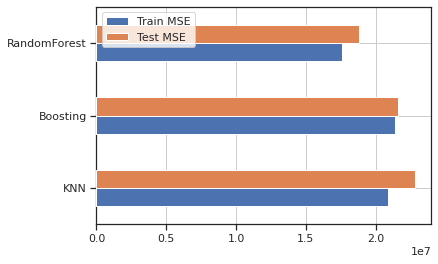

In [ ]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
plt.legend(loc="upper left")
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model RandomForest memberikan nilai eror (MSE) yang paling kecil. Sebelum memutuskan model terbaik untuk melakukan prediksi "charges" atau besarnya biaya tagihan asuransi tiap pengguna. Mari kita coba uji prediksi menggunakan beberapa sampel acak (5) pada data uji.

In [ ]:
dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

X_sample = X_test.sample(10)
dict_result['index_sample'] = X_sample.index.values
dict_result['y_true'] = [pd.DataFrame(y_test).loc[idx, 'charges'] for idx in dict_result['index_sample']]

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
  dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
index_sample,,,,
237,4463.2051,7148.022531,6010.452936,8162.155537
403,10269.4600,11223.067489,11502.196700,13514.180116
132,11163.5680,12899.519489,12383.588724,13514.180116
518,5240.7650,6820.887846,6886.607595,8176.287072
664,27037.9141,23587.395953,25471.551144,23895.020011
768,14319.0310,12162.102101,14987.491837,15104.696845
750,19539.2430,22935.986694,19594.504247,20508.369218
336,12142.5786,11380.243522,15234.154100,15104.696845
482,1622.1885,3905.273577,3304.906371,5585.758353


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.

## Kesimpulan

Berdasarkan hasil evaluasi model di atas, dapat disimpulkan bahwa model terbaik untuk melakukan prediksi biaya tagihan asuransi pengguna adalah Random Forest. Hal ini dilihat dari nilai akurasi pada data uji yang menunjukan bahwa algoritma Random Forest mempunyai nilai MSE terendah yaitu 17583824.714712 (pada data latih) dan 18797803.324575 (pada data uji).

##  Daftar Referensi

[1] Seltman, Howard J. “Experimental Design and Analysis”. 2018. Tersedia: [tautan](https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf).  
[2] Rhys, Hefin. "Machine Learning with R, the Tidyverse, and MLR". Manning Publications. 2020. Tersedia: [O'Reilly Media](https://learning.oreilly.com/library/view/machine-learning-with/9781617296574/).

## Data Diri
- Muhamad Ardi Apriansyah
- M107X0142
- M06